# Clustering

In [ ]:
!pip install networkx
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.1-cp37-none-any.whl size=5734 sha256=b2230cad057e053fd68a6e3939ace6b9701571616ff3f21d2d9fdc3deb24aba1
  Stored in directory: /root/.cache/pip/wheels/b3/59/ea/22e964f74bb864c5423cf82027a4d69dd65bac0bbf95fd46f5
Successfully built node2vec


In [ ]:
import networkx as nx
from node2vec import Node2Vec
from matplotlib import pyplot as plt

In [ ]:
import os, sys
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
###################### Dataset Description ##########################
'''
    [Reference]
        title={The Network Data Repository with Interactive Graph Analytics and Visualization},
        author={Ryan A. Rossi and Nesreen K. Ahmed},
        booktitle={AAAI},
        url={http://networkrepository.com},
        year={2015}

'''
###### lesmis.mtx : <node 1> <node 2> <weight> ######################
###### weight : 레미제라블에 동시에 등장한 등장인물의 횟수 ##########
#####################################################################

'\n    [Reference]\n        title={The Network Data Repository with Interactive Graph Analytics and Visualization},\n        author={Ryan A. Rossi and Nesreen K. Ahmed},\n        booktitle={AAAI},\n        url={http://networkrepository.com},\n        year={2015}\n\n'

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd ./drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
weighted_edgelist = []
with open("./data/lab/lab7/lesmis.mtx", 'r') as f:
  for line in f:
    line = line.strip().split()
    if line[0].isdigit() == False:
      continue
    weighted_edgelist.append((str(int(line[0])-1), str(int(line[1])-1), float(line[2])))

G =nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)

In [ ]:
node2vec = Node2Vec(G, dimensions = 16, walk_length = 4, num_walks = 200, workers = 4)
model = node2vec.fit(window = 2)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [38]:
vectors_array = np.zeros((len(G.nodes), 16))
for node in G.nodes:
  vectors_array[int(node)] = model.wv[node]

kmeans = KMeans(n_clusters=5, random_state=0).fit(vectors_array)
# cluster is not a community

ValueError: ignored

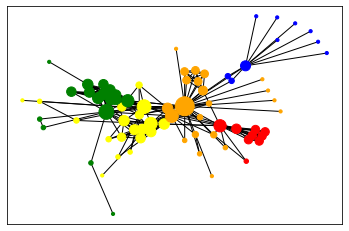

In [ ]:
pos = nx.spring_layout(G)
node_color = []
node_degree = []
for node in G.nodes:
  node_degree.append(G.degree[node]*10)
  i = int(node)
  if kmeans.labels_[i] == 0:
    node_color.append('red')
  elif kmeans.labels_[i] == 1:
    node_color.append('yellow')
  elif kmeans.labels_[i] == 2:
    node_color.append('blue')
  elif kmeans.labels_[i] == 3:
    node_color.append('green')
  else :
    node_color.append('orange')
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_degree)
nx.draw_networkx_edges(G, pos)
plt.show()

# Node Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [39]:
node_class = dict()
edgelist = list()
class_num = 1
class_name_to_num = dict()
with open('./data/lab/lab7/cora.content', 'r') as f, open("./data/lab/lab7/cora.cites") as f2:
  for line in f:
    line = line.strip().split()
    class_name = line[-1]
    if class_name not in class_name_to_num.keys(): 
      class_name_to_num[class_name] = class_num
      class_num += 1
    node_class[line[0]] = class_name_to_num[class_name]
  for line in f2:
    line = line.strip().split()
    edgelist.append((line[1], line[0]))

In [40]:
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [ ]:
G.nodes

NodeView(('1033', '35', '103482', '103515', '1050679', '1103960', '1103985', '1109199', '1112911', '1113438', '1113831', '1114331', '1117476', '1119505', '1119708', '1120431', '1123756', '1125386', '1127430', '1127913', '1128204', '1128227', '1128314', '1128453', '1128945', '1128959', '1128985', '1129018', '1129027', '1129573', '1129683', '1129778', '1130847', '1130856', '1131116', '1131360', '1131557', '1131752', '1133196', '1133338', '1136814', '1137466', '1152421', '1152508', '1153065', '1153280', '1153577', '1153853', '1153943', '1154176', '1154459', '116552', '12576', '128540', '132806', '135130', '141342', '141347', '148170', '15670', '1688', '175291', '178727', '18582', '190697', '190706', '1956', '197054', '198443', '198653', '206371', '210871', '229635', '231249', '248425', '249421', '254923', '259701', '259702', '263279', '263498', '265203', '273152', '27510', '28290', '286500', '287787', '28851', '289779', '289780', '289781', '307015', '335733', '33904', '33907', '35061', '3

In [41]:
import time

In [42]:
s = time.time()

node2vec = Node2Vec(G, dimensions=32, walk_length=50, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

print(f"time: {time.time()-s}")


time: 690.7344665527344


In [43]:
X = list()
y = list()
node_name_to_idx = dict()
for i, (v, class_) in enumerate(node_class.items()):
  node_name_to_idx[v] = i
  X.append(model.wv[v])
  y.append(class_)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

In [44]:
clf = MLPClassifier(max_iter = 500).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [45]:
y_predict = clf.predict(X_test)

In [46]:
print(f"accuracy: {accuracy_score(y_test, y_predict)*100: 5.2f}%")

accuracy:  79.62%


In [47]:
print("########## Comparison of Predicted and Test Results ######")
for i in range(len(y_test)//20):
    print("#########################################################")
    print("predict: \t", y_predict[i*20:(i+1)*20])
    print("real val:\t", y_test[i*20:(i+1)*20])

########## Comparison of Predicted and Test Results ######
#########################################################
predict: 	 [6 6 1 1 4 5 5 4 1 4 6 4 7 4 6 1 1 6 4 2]
real val:	 [6 6 1 7 4 5 5 4 1 1 6 4 7 4 6 1 1 3 4 7]
#########################################################
predict: 	 [7 1 4 3 1 5 4 4 4 4 1 6 6 1 7 4 5 6 1 7]
real val:	 [7 1 4 3 1 3 4 4 5 4 1 6 6 1 1 1 3 6 1 7]
#########################################################
predict: 	 [5 1 2 3 1 4 1 1 1 3 1 6 1 1 1 3 1 6 1 5]
real val:	 [2 1 2 3 1 4 1 1 1 3 1 6 1 1 1 3 1 6 1 5]
#########################################################
predict: 	 [4 3 1 6 2 5 4 1 5 3 4 6 6 3 4 6 7 3 6 4]
real val:	 [4 1 1 6 2 5 4 1 5 3 4 6 6 3 4 6 7 3 6 1]
#########################################################
predict: 	 [5 1 1 7 2 7 6 7 1 1 6 5 5 6 6 1 6 4 3 2]
real val:	 [5 1 1 7 2 7 6 1 1 1 2 2 5 6 6 1 6 4 3 2]
#########################################################
predict: 	 [6 3 4 6 5 7 1 1 5 4 6 4 5 6 1 4 5 4 4 2]
real val:	